# How many ground truths in each dataset?

In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = "inputs-2020-07/BF-C2DL-HSC/"

In [3]:
sample_image = "inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg1369.tif"

In [11]:
sample_image = "../data/inputs-2020-07/Fluo-C3DH-A549/01_GT/SEG/man_seg015.tif"

In [12]:
sample_image

'../data/inputs-2020-07/Fluo-C3DH-A549/01_GT/SEG/man_seg015.tif'

In [20]:
img = tifffile.imread(sample_image)

In [21]:
img.shape

(29, 300, 350)

In [22]:
img[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(300, 350), dtype=uint16)

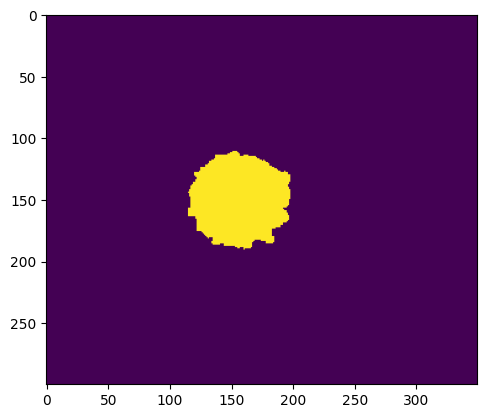

In [28]:
plt.imshow(img[23])

In [4]:
def get_instance_bounding_boxes(segmentation_image):
    if segmentation_image.dtype != np.int32:
        segmentation_image = segmentation_image.astype(np.int32)
    
    instance_ids = np.unique(segmentation_image)
    instance_ids = instance_ids[instance_ids != 0]
    
    bounding_boxes = {}
    
    for instance_id in instance_ids:
        coords = np.argwhere(segmentation_image == instance_id)
        
        if coords.size > 0:
            min_y, min_x = coords.min(axis=0)
            max_y, max_x = coords.max(axis=0)
            
            bounding_boxes[instance_id] = (min_x, min_y, max_x, max_y)
    
    return bounding_boxes

In [5]:
def get_image_segmentations_statistics(tiff_image):
    segmentation_image = tifffile.imread(tiff_image)
    instance_ids = np.unique(segmentation_image)
    instance_ids = instance_ids[instance_ids != 0]
    bounding_boxes = {}
    for instance_id in instance_ids:
        coords = np.argwhere(segmentation_image == instance_id)
        
        if coords.size > 0:
            min_y, min_x = coords.min(axis=0)
            max_y, max_x = coords.max(axis=0)
            
            bounding_boxes[instance_id] = (min_x, min_y, max_x, max_y)
    return len(instance_ids), bounding_boxes, np.shape(segmentation_image)

In [6]:
from glob import glob

In [10]:
box_info_large = {
                "box_id": 0,
                "x_length": 0,
                "y_length": 0,
                "square_size": 0
            }

In [7]:
def analyze_bounding_boxes(all_bounding_boxes):
    analysis_results = []
    all_squares = []
    
    for image_idx, image_boxes in enumerate(all_bounding_boxes):
        image_analysis = {
            "boxes": [],
            "largest_square": box_info_large
            "smallest_square": float('inf'),
        }

        for box_id, box in image_boxes.items():
            x_length = box[2] - box[0]
            y_length = box[3] - box[1]
            square_size = x_length * y_length

            box_info = {
                "box_id": box_id,
                "x_length": x_length,
                "y_length": y_length,
                "square_size": square_size
            }

            image_analysis["boxes"].append(box_info)
            all_squares.append(square_size)

            # Update image-specific statistics
            if square_size > image_analysis["largest_square"]['square_size']:
                image_analysis["largest_square"] = box_info
            if square_size < image_analysis["smallest_square"]['square_size']:
                image_analysis["smallest_square"] = box_info
            image_analysis["smallest_square"] = min(image_analysis["smallest_square"], square_size)
        analysis_results.append(image_analysis)

    # Calculate overall statistics
    overall_stats = {
        "total_boxes": sum(len(image["boxes"]) for image in analysis_results),
        "overall_largest_square": max(all_squares),
        "overall_smallest_square": min(all_squares),
    }

    return overall_stats
            

In [8]:
ground_truths = glob(f"{dataset_path}/01_GT/SEG/*") + glob(f"{dataset_path}/02_GT/SEG/*")
total_amount_of_segmentation_ground_truths = 0
all_bounding_boxes = []
image_sizes = []
for tiff_image in ground_truths:
    n_segmentations, bounding_boxes, image_size = get_image_segmentations_statistics(tiff_image)
    total_amount_of_segmentation_ground_truths += n_segmentations
    all_bounding_boxes.append(bounding_boxes)
    image_sizes.append(image_size)
print(analyze_bounding_boxes(all_bounding_boxes))
print(total_amount_of_segmentation_ground_truths)
print(np.unique(image_sizes))
print(image_size)

{'total_boxes': 564, 'overall_largest_square': 792, 'overall_smallest_square': 221}
564
[1010]
(1010, 1010)


In [20]:
img = tifffile.imread(sample_image)

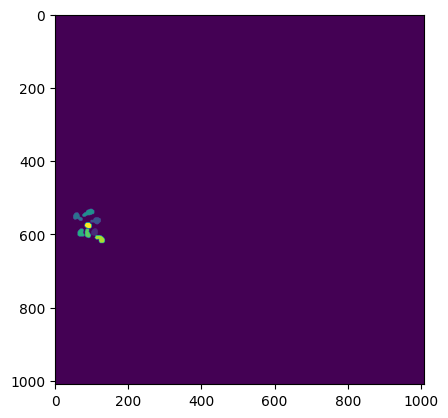

In [21]:
plt.imshow(img)

In [46]:
np.unique(img, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=uint16),
 array([1017472,     296,     360,     348,     403,     302,     295,
            377,     247]))

# RAW DATA DISTRIBUTION

In [20]:
import pathlib
import tifffile

In [19]:
random_raw_image_path = pathlib.Path("inputs-2020-07/BF-C2DL-HSC/01/t0000.tif")

In [21]:
raw_image = tifffile.imread(random_raw_image_path)

In [24]:
np.max(raw_image)

254